Выполнила: 
**Лолита Ведзижева**

# Анализ данных по подбору в компанию Х студентов и выпускников (Campus Recruitment)

# Постановка проблемы

Набор перспективных студентов и выпускников в компанию (Campus Recruitment) - это стратегия поиска, привлечения и найма молодых талантов на стажировки и должности начального уровня. Набор студентов, как правило, является тактикой для средних и крупных компаний с большими потребностями в наборе персонала, но может варьироваться от незначительных вложений (например, работа с университетскими центрами карьеры для поиска потенциальных кандидатов) до крупномасштабных кампаний (например, посещение широкого числа вузов и посещение мероприятий по подбору персонала в течение учебного года). Найм перспективных студентов и выпускников часто включает работу с университетскими центрами карьеры и посещение ярмарок вакансий. 

От того, насколько грамотно выстроен подбор специалистов с университетской скамьи, зависят не только текущие результаты компании, но и перфоманс организации в долгосрочной перспективе. Многие компании имеют отличные результаты в практике продвижения сотрудников со стажировок до лидирующих позиций в компании.

## О датасете

Наш набор данных включает в себя информацию о поступлении студентов в одну из бизнес-школ в Индии. Датасет включает в себя процентное соотношение средней и высшей школы и специализацию. В датасете указаны различные факторы, влияющие на прием кандидатов на работу, такие как опыт работы, результаты сдачи экзаменов и т.д., Также, в нем содержится информация о статусе найма и вознаграждении.

## Основные цели анализа датасета

Анализ данного датасета должен привести к трем основным целям:

* Провести предварительный анализ набора данных о найме персонала
* Провести визуализация набора данных о найме персонала
* Спрогнозировать, на основе каких факторов можно судить о том, что студента примут на работу, используя классификационные модели

# Импорт данных, разведочный анализ данных

## Импорт данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [4]:
placement=pd.read_csv("Placement_Data_Full_Class.csv")

## Разведочный анализ данных

In [5]:
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Выводы**

* У нас есть данные по полу и уровню образования;
* У нас есть все данные об успеваемости (баллах) в сфере образования;
* У нас есть сведения о месте работы и заработной плате;
* Мы можем ожидать, что у нас нет нулевых значений в заработных платах, поскольку кандидаты, которые не были устроены в компанию, не будут иметь зарплаты;
* Статус трудоустройства (Status) - наша целевая переменная, остальные являются независимыми переменными, за исключением заработной платы.

In [6]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
print (placement_copy.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


В датасете **215 строк о кандидатах**, и в каждом столбце мы имеем смешанные типы данных. У нас есть несколько недостающих значений в столбце зарплата, как и ожидалось, так как здесь значения студентов, которых не приняли на работу

In [7]:
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

В нашем датасете следующие типы данных: **1 integer,5 float and 8 object** 

## Очистка данных

In [8]:
print('Data columns with null values:',placement.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


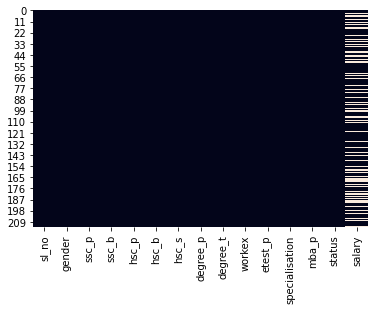

In [9]:
sns.heatmap(placement.isna(),cbar=False)
plt.show()

**Выводы**

* В наших данных 67 нулевых значений, то есть 67 незанятых кандидатов;
* Мы не можем просто удалисть эти значения, поскольку эти значения говорят о том, почему кандидаты не смогли устроиться на работу;
* Мы не можем также учитывать при расчета средних и медианных значений, так как это будет противоречить контексту этого набора данных;
* Самый правильный способ работать с этими нулевыми значениями - присвоить им значение "0", которое показывает, что у них нет никакого дохода.

In [10]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [11]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


In [12]:
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Предварительная оценка возможных фич

Основываясь на данных из датасета, можно предложить следующие варианты анализа фич:

Поскольку у нас есть данные по числу трудоустроенных и нетрудоустроенных кандидатов, целесообразно сравнить и установить корреляцию между различными переменными. То есть, насколько та или иная характеристика кандидата повлияла на итог процесса рекрутмента. 

В данном случае мы можем:

* оценить влияние наличия какого-либо из уровней образования на трудоустройство;
* оценить влияение академической успеваемости на трудоустройство;
* оценить влияние принадлежности к тому или иному полу на трудоустройство;
* оценить влияние направления образования (специальности) на трудоустройство;
* оценить влияние наличия опыта работы на трудоустройство и т. д.

Также у нас есть данные по уровню заработных плат трудоустроенных кандидатов, соответственно, у нас есть возможность:

* оценить влияние принадлежности к тому или иному полу на уровень заработных плат;
* оценить влияние направления образования (специальности) на уровень заработных плат;
* оценить влияние наличия опыта работы на уровень заработных плат и т. д.

Также у нас есть возможность посмотреть на распределение тех или иных значений:

* мы можем посмотреть, какое распределение в наших данных по уровню заработных плат;
* какое распределение в наших данных по академической успеваемости и т. д.

Кроме того, мы можем оценить корреляцию между определенными признаками, например:

* взаимосвязь академических результатов на разных уровнях образования.

# Подготовка пайплайна данных, инжиниринг фич

## Выбросы
Чтобы понять, насколько выбросы портят данные, для начала их визуализируем

Text(0.5, 1.0, 'Employability percentage')

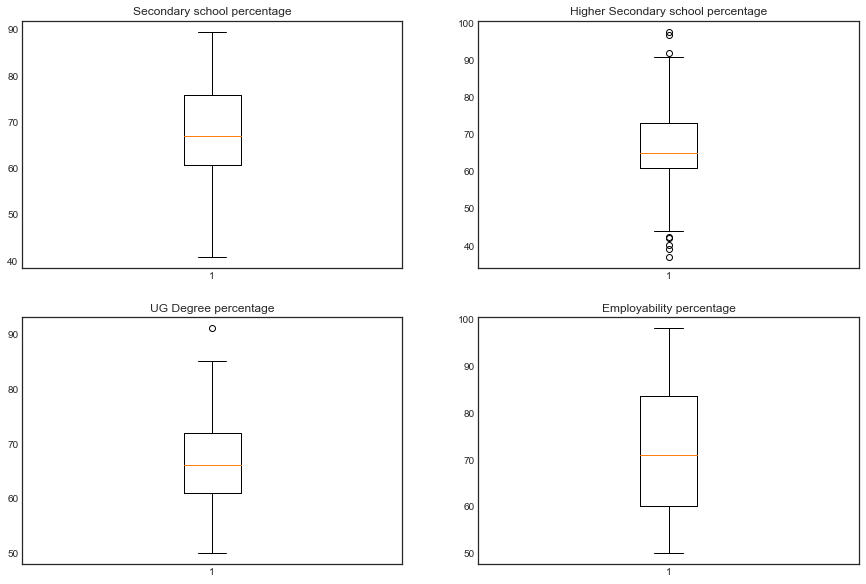

In [13]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability percentage')

Поскольку у нас получилось мало выбросов, и в основном они по значениям hsc_p, мы их очистим.

In [15]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

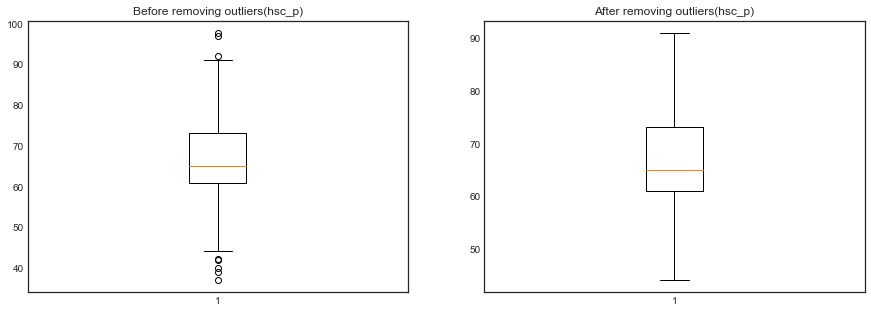

In [16]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

Теперь у нас нет выбросов!

## Визуализация данных
### Построение графиков для определение категориальных признаков

[Text(0, 0, 'Placed'), Text(1, 0, 'Not Placed')]

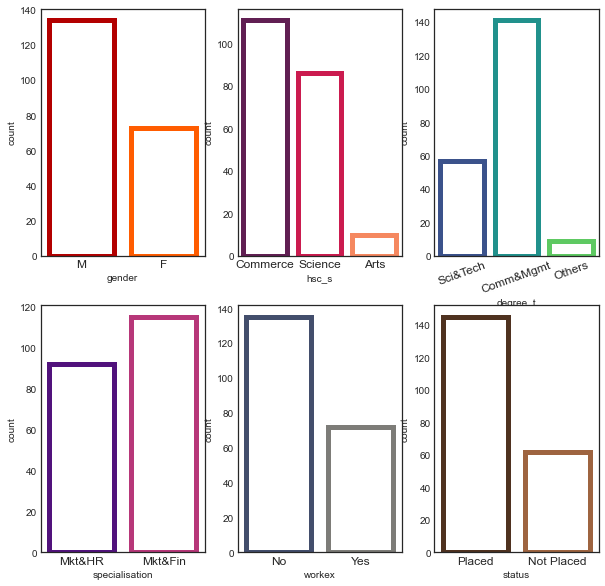

In [17]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Специализация
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Опыт работы
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Уровень образования
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Пол
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Второе высшее образование
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Статус подбора
plt.subplot(236)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

**Выводы**

* В наших данных **больше кандидатов мужчик**, чем женщин;
* Большинство кандидатов имеют направление **Коммерция** среди кандидатов с HSC и студентов;
* Кандидаты с ** Научным образованием** занимают второе место в обоих случаях;
* Также много кандидатов из двойной специализации **Маркетинга и финансов**;
* Большинство кандидатов из нашего набора данных **не имеют никакого опыта работы**;
* Большинство кандидатов из нашего набора данных **были трудоустроены** в компании.

### Распределение заработных плат - Трудоустроенные студенты

C:\Users\velom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\velom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

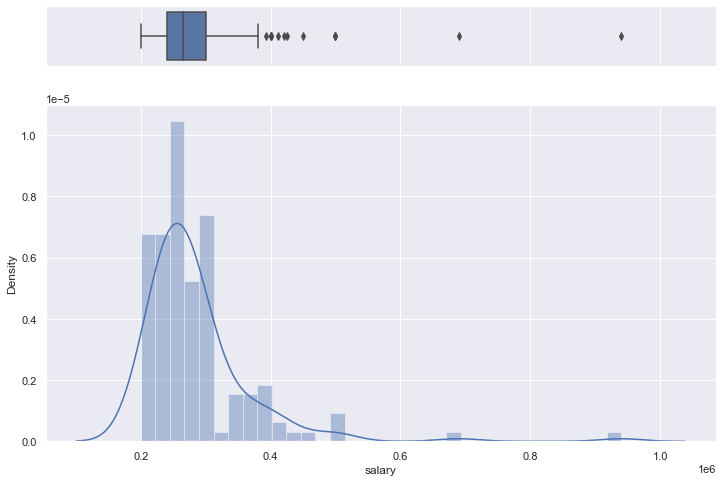

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


**Выводы**

* Заработная плата большинства кандидатов распределяется в следующем диапазоне **2L-4L PA**;
* Только **у одного** кандидата доход равен 10L PA;
* **Средняя зарплата** составляет чуть больше 2LPA.

Примечание: LPA - это единица затрат для компаний в Индии. Это означает Lakhs * per Annum. В Индии сотруднику компании предлагается годовое вознаграждение, эта стоимость вознаграждения определяется как «Затраты для компании», которые в основном представляют собой максимальную сумму, которую компания собирается прямо или косвенно потратить на сотрудника в течение этого года.

### Распределение

C:\Users\velom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\velom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\velom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

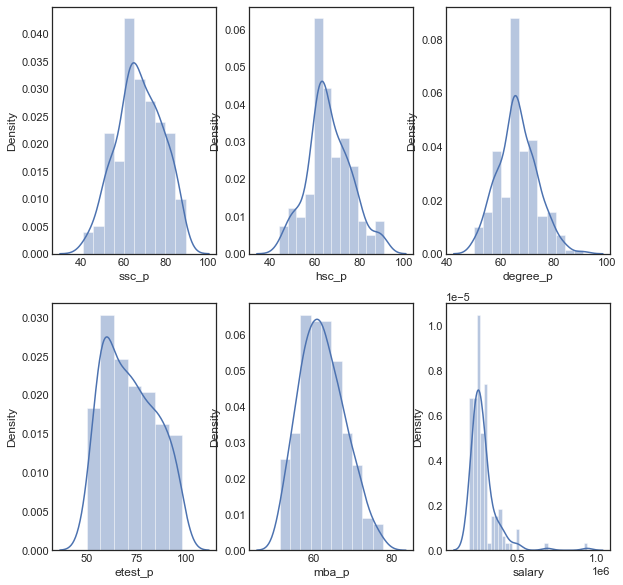

In [19]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(placement_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(placement_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(placement_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(placement_filtered['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(placement_filtered['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(placement_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Выводы**

* Все распределения соответствуют **нормальному распределению**, за исключением функции заработной платы;
* У большинства кандидатов **успеваемость в образовании составляет от 60 до 80%**;
* Выбросы - немногие получают зарплату в размере 7,5 L и 10 LPA.

### Опыт работы и трудоустройство

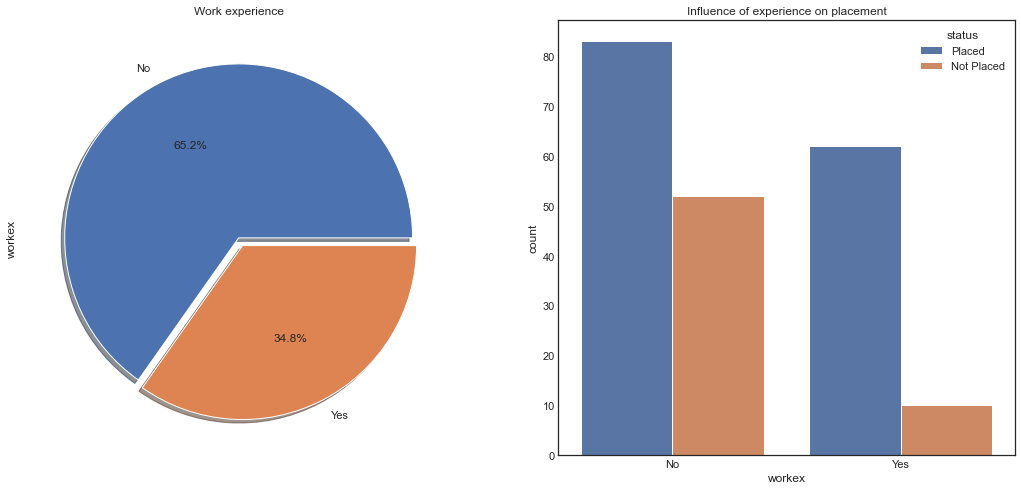

In [20]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

**Выводы**

* Почти **65,2%** трудоустроенных кандидатов никогда не имели никакого опыта работы;
* Кандидатов, у которых **никогда не было опыта работы**, приняли на работу больше, чем тех, у кого был опыт;
* Мы можем сделать вывод, что **опыт работы не влияет** на трудоустройство кандидата.

### Наличие степени MBA и трудоустройство - Насколько влияет успеваемость?

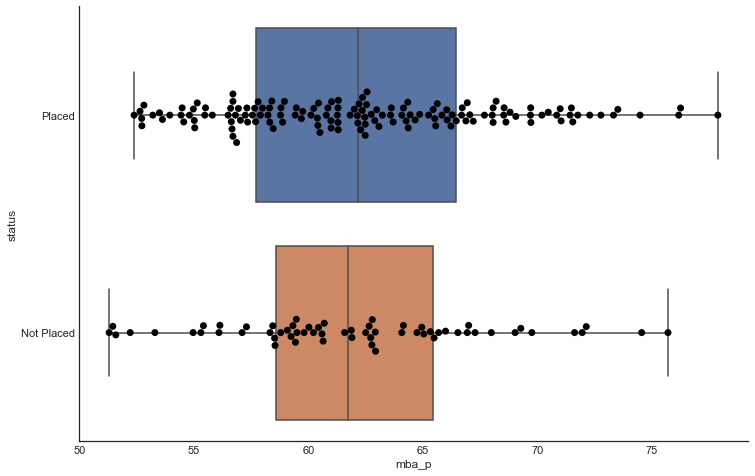

In [22]:
g = sns.boxplot(y = "status",x = 'mba_p',data = placement_filtered, whis=np.inf)
g = sns.swarmplot(y = "status",x = 'mba_p',data = placement_filtered, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

**Вывод**

Существует небольшая разница в процентных показателях между обеими группами, но, тем не менее, более высокая успеваемость влияет на трудоустройство в компании (согласно графику). 

### Влияние пола на трудоустройство и уровень заработной платы

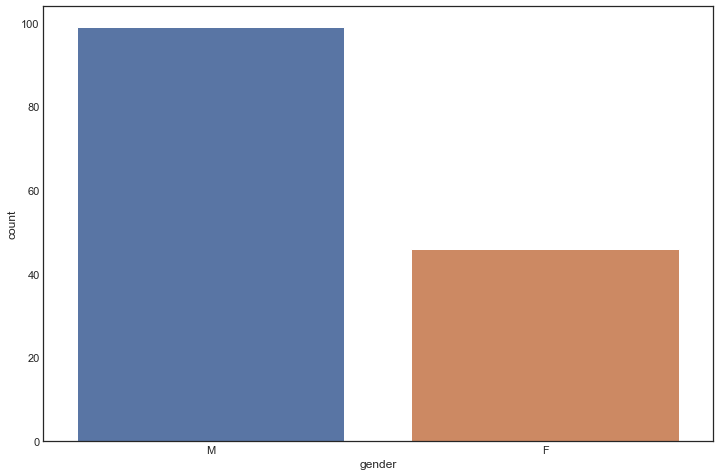

In [23]:
sns.countplot(x = placement_placed['gender'])
plt.show()

In [24]:
grp_gen=pd.DataFrame(placement_placed.groupby('gender')['gender'].count())
grp_gen

,gender
gender,
F,46
M,99


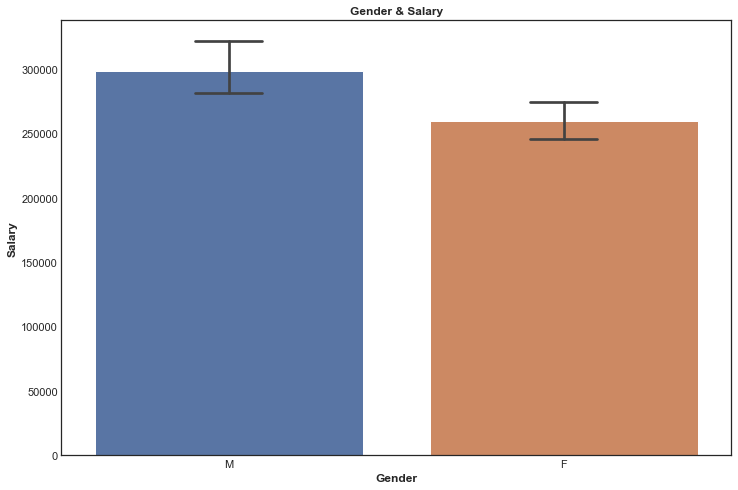

In [25]:
sns.barplot(x='gender',y='salary',data = placement_placed,capsize=.2)
plt.title("Gender & Salary",fontweight = 'bold')
plt.xlabel("Gender",fontweight = 'bold')
plt.ylabel("Salary",fontweight = 'bold')
plt.show()

**Выводы**

* Самые высокие зарплаты у кандидатов **мужчин**;
* Было трудоустроено больше кандидатов мужчин по сравнению с кандидатами женщинами.


### Корреляция между академическими результатами

<AxesSubplot:>

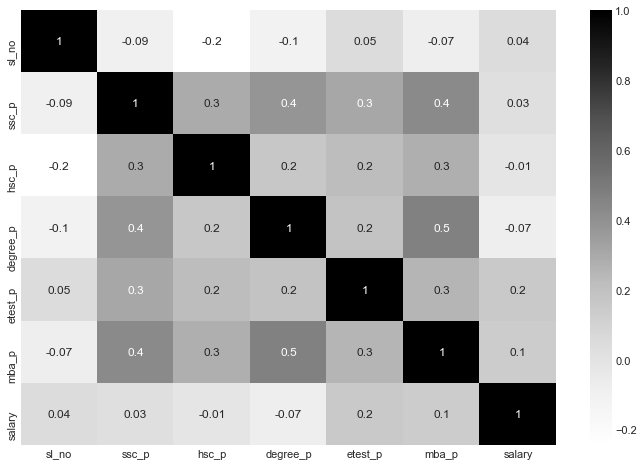

In [26]:
sns.heatmap(placement_placed.corr(),annot=True,fmt='.1g',cmap='Greys')

**Выводы**

* Кандидаты, которые хорошо учились в средней школе, хорошо учились в высшей школе и на более высшей ступени, на уровне mba и даже успешно проходили тест при трудоустройстве;
* Эти результаты не оказывают никакого влияния на их зарплату.

### Распределение данных

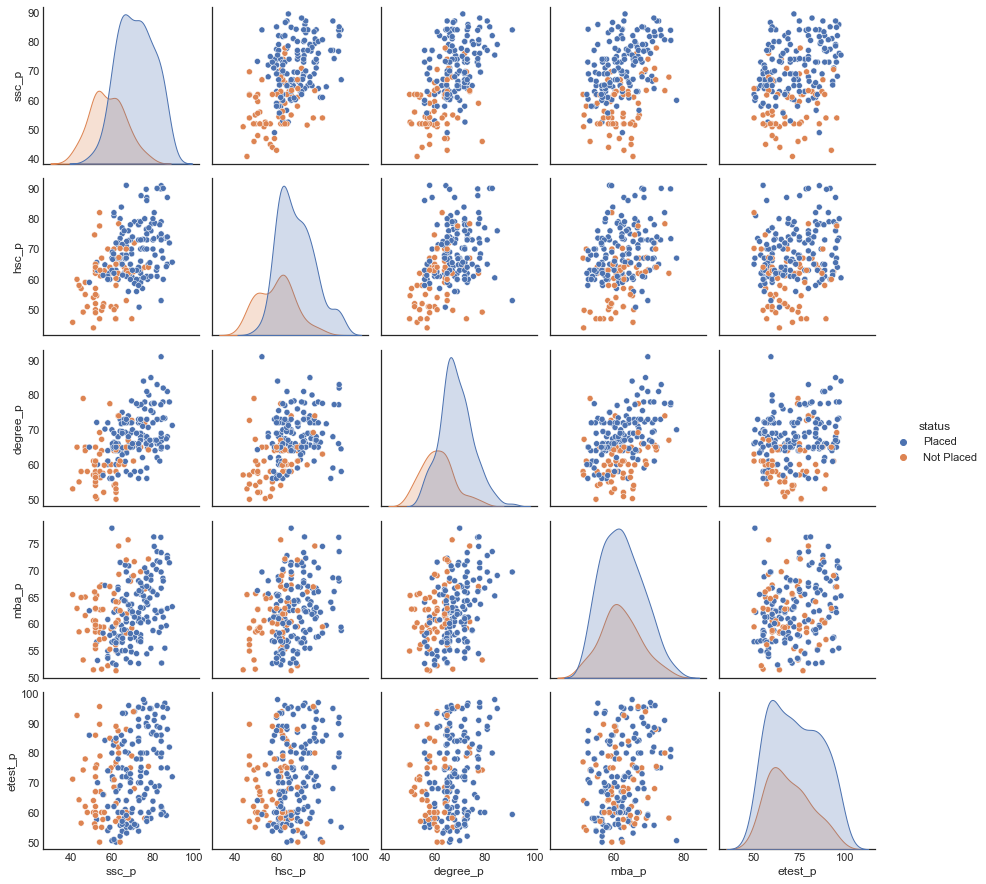

In [27]:
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

**Выводы**

* Кандидаты, набравшие **высокий балл в старших классах высшей школы, были трудоустроены**;
* Те, кто получил **высокие баллы в средних школах, были трудоустроены**.

# Подготовка и обучение модели, сравнение разных реализаций

Прежде чем перейти к созданию моделей, необходимо подготовить наш датасет для моделей. У нас есть категориальные переменные, которые необходимо закодировать.

In [28]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Делаем копию 
object_cols=['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [29]:
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [30]:
feature_cols=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

14

### Определение целевой переменной (Y) и переменной-предиктора (X)

Наша цель - помочь определить, какой кандидат с большей вероятностью будет трудоустроен в компанию.

Мы будем использовать все функции, кроме "зарплаты", так как эти значения не будут способствовать прогнозированию (так как студенты получают зарплату после того, как они трудоустроятся, поэтому мы не можем использовать эту функцию).

In [26]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

### Разделение датасета на Train и Test (80:20)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 14)
Input Test: (42, 14)
Output Training: (165,)
Output Test: (42,)


## Модели для машинного обучения

### Логистическая регрессия

Для определения точности модели

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


**81% точности** - высокий показатель.

### Матрица ошибок и метрики классификации

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  7]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        27

    accuracy                           0.81        42
   macro avg       0.84      0.75      0.77        42
weighted avg       0.82      0.81      0.80        42



**Инсайты**

* Матрица ошибок говорит нам, что у нас есть **9+26** правильных прогнозов и **1+6** неверных прогнозов;
* Метрики классификации по Classification Report показывают, что у нас точность **84%**, что означает точность, с которой классификатор моделей не помечает фактор положительным, если он отрицательный. Важно учитывать значение точности, чтобы избежать ошибок при прогнозе.

### ROC-кривая

Для проверки производительност нашей модели

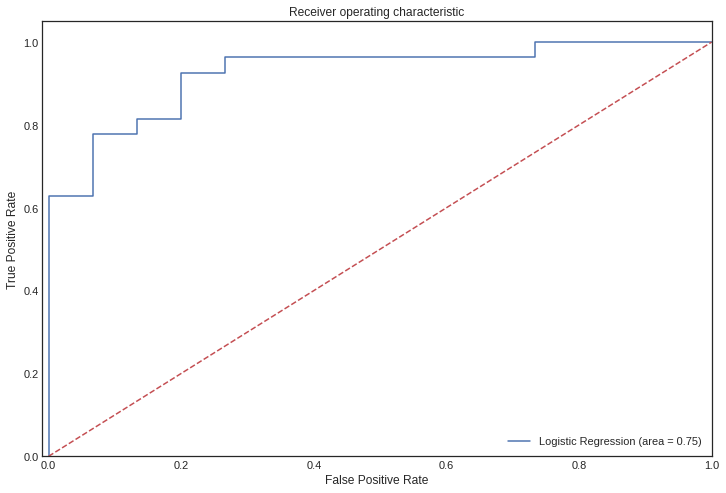

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Из кривой ROC мы можем сделать вывод, что наша логистическая модель правильно классифицировала трудоустроенных студентов, а не предсказывала ложноположительный результат. Чем больше кривая ROC (синяя) лежит в верхней левой части, тем лучше работает наша модель. Мы можем выбрать **0,8 или 0,9** для порогового значения, которое может принести нам правильные положительные результаты.

# Выводы

Из аналитического отчета по исходному датасету о найме старшекурсников и выпускников можно сделать следующие выводы:

* **Успеваемость** сильно влияет на то, чтобы кандидат мог быть трудоустроен;
* **Прошлый опыт работы** не сильно влияет на прием на работу;
* При приеме на работу **может прослеживаться определенная дискриминация по признаку пола** так как более высокие зарплаты были предоставлены мужчинам, однако практически нет влияния на сам факт трудоустройства;
* Академические результаты **не влияют** на уровень заработной платы.

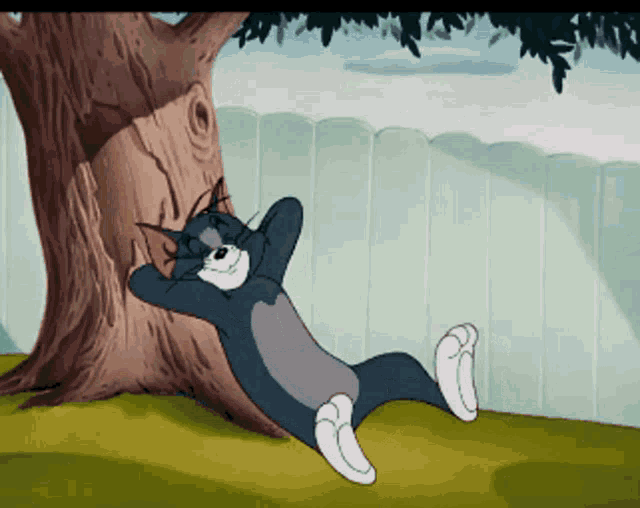